In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

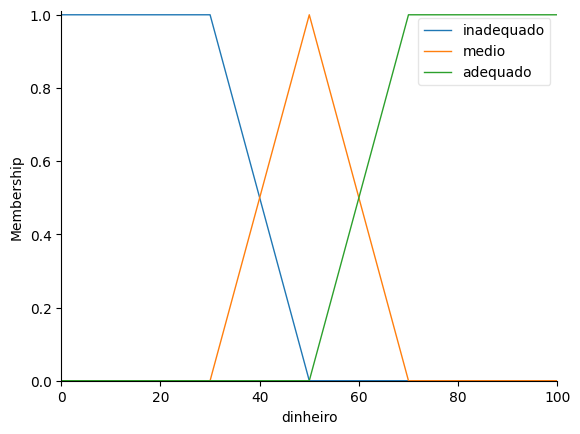

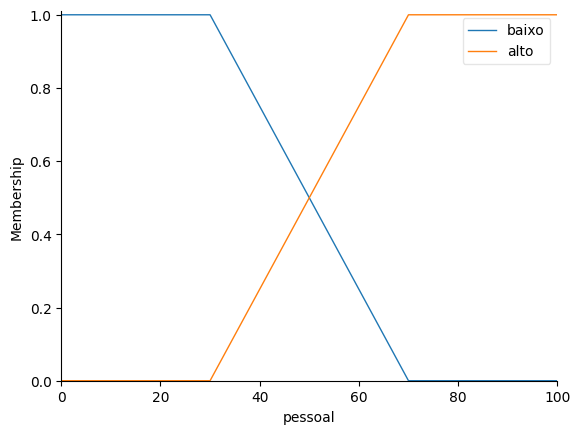

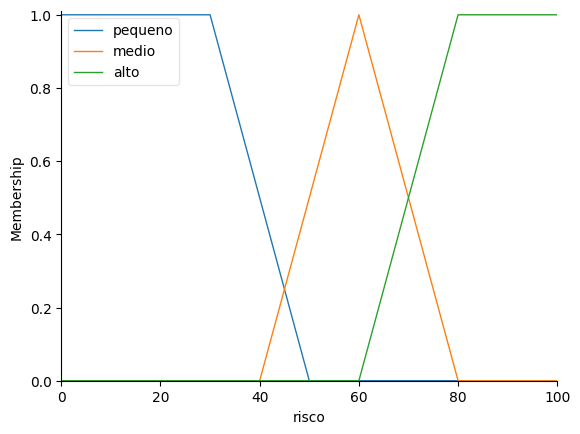

In [8]:

# variaveis de entrada 
dinheiro = ctrl.Antecedent(np.arange(0, 101, 1), 'dinheiro')
pessoal = ctrl.Antecedent(np.arange(0, 101, 1), 'pessoal')

# variavel saida
risco = ctrl.Consequent(np.arange(0, 101, 1), 'risco')

# fuzzyficacao

# dinheiro eh classificado em inadequado, medio e adequado
dinheiro['inadequado'] = fuzz.trapmf(dinheiro.universe, [0, 0, 30, 50]) # grafico trapezoidal
dinheiro['medio'] = fuzz.trimf(dinheiro.universe, [30, 50, 70]) # grafico triangular
dinheiro['adequado'] = fuzz.trapmf(dinheiro.universe, [50, 70, 100, 100]) # grafico trapezoidal

# quantidade de pessoas
pessoal['baixo'] = fuzz.trapmf(pessoal.universe, [0, 0, 30, 70]) # grafico trapezoidal
pessoal['alto'] = fuzz.trapmf(pessoal.universe, [30, 70, 100, 100]) # grafico trapezoidal

# risco 
risco['pequeno'] = fuzz.trapmf(risco.universe, [0, 0, 30, 50]) 
risco['medio'] = fuzz.trimf(risco.universe, [40, 60, 80])
risco['alto'] = fuzz.trapmf(risco.universe, [60,80,100,100])

# prepara os graficos para plotagem
dinheiro.view()
pessoal.view()
risco.view()

# plota os graficos abertos anteriormente (<variavel>.view())
plt.show()

32.78985507246378


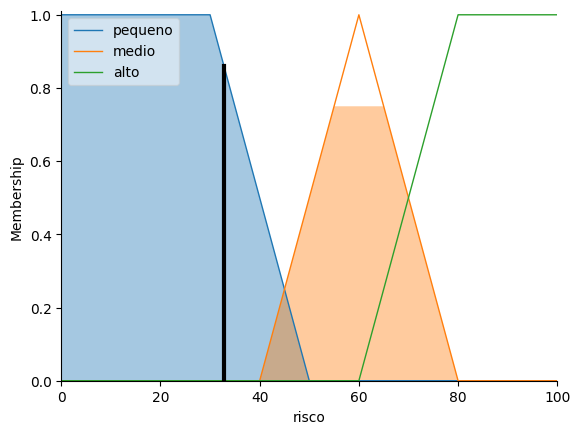

In [11]:
# definicao das regras
regra1 = ctrl.Rule(dinheiro['adequado'] | pessoal['baixo'], risco['pequeno']) # se o dinheiro for adequado e a quantidade de pessoas for baixo, o risco sera pequeno
regra2 = ctrl.Rule(dinheiro['medio']    | pessoal['alto'],  risco['medio']) # se o dinheiro for medio e a quantidade de pessoas for alta o risco sera medio
regra3 = ctrl.Rule(dinheiro['inadequado'], risco['alto']) # se o dinheiro for inadequado, o risco sera alto

# ativacao das regras
controle_risco = ctrl.ControlSystem([regra1, regra2, regra3]) # inserindo as regras ao sistema
simulador_risco = ctrl.ControlSystemSimulation(controle_risco) # com base nas regras, o sistema simulará os riscos

# variaveis de entrada para teste, lembrando que os valores devem estar dentro dos definidos anteriormente
simulador_risco.input['dinheiro'] = 100
simulador_risco.input['pessoal'] = 60

# simula o sistema com os valores passados
simulador_risco.compute()

# agregacao
print(simulador_risco.output['risco']) # printa o valor calculado na simulacao

risco.view(sim=simulador_risco) # prepara a simulacao para plotagem
plt.show() # plota a view aberta anteriormente